In [1]:
import fastai.text.all as ft
import torch
import pickle
import pandas as pd

### Get pretrained AWD-LSTM protrained model (on wikitext103) from Fast.ai

In [3]:
ft.URLs.WT103_FWD

'https://s3.amazonaws.com/fast-ai-modelzoo/wt103-fwd.tgz'

In [4]:
AWDLSTM_PATH = ft.untar_data(ft.URLs.WT103_FWD)
AWDLSTM_PATH

Path('C:/Users/ziolo/.fastai/data/wt103-fwd')

### Load the vocab (list of string tokens)

In [5]:
vocab_path = AWDLSTM_PATH.ls()[0]
print(vocab_path)

C:\Users\ziolo\.fastai\data\wt103-fwd\itos_wt103.pkl


In [6]:
with open(vocab_path, "rb") as f:
     vocab = pickle.load(f)
        
print(len(vocab))
print(vocab[:100])

60000
['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep', 'the', ',', '.', 'of', 'and', 'in', 'to', 'a', '=', '"', 'was', 'on', '-', "'s", 'as', 'for', 'that', 'with', 'by', '\n ', ')', '(', '\n \n ', 'is', 'his', 'at', 'he', 'it', 'from', 'were', 'an', 'had', 'which', 'be', 'this', 'but', "'", 'are', 'not', 'first', 'their', 'after', ';', 'one', 'her', '–', 'also', 'its', ':', 'they', 'two', 'or', 'have', 'who', 'new', 'been', 'has', 'she', 'when', 'time', 'during', 'other', 'would', 'into', 'all', 'more', 'while', 'over', 'i', 'him', 'game', 'only', 'later', 'up', 'most', 'three', 'about', 'out', 'between', 'there', 'than', 'some', 'film', 'may', 'no', 'before', 'made', 'such', 'season', 'second', 'where']


### Load the weights

In [7]:
weights_path = AWDLSTM_PATH.ls()[1]
print(weights_path)

C:\Users\ziolo\.fastai\data\wt103-fwd\lstm_fwd.pth


In [8]:
torch.cuda.is_available()

False

In [9]:
torch.backends.cudnn.enabled

True

In [10]:
!nvidia-smi

Tue Apr 06 17:10:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 398.36                 Driver Version: 398.36                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1050   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8    N/A /  N/A |     68MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [11]:
model_weights = torch.load(weights_path, map_location=torch.device('cpu'))
print(model_weights.keys())

odict_keys(['0.encoder.weight', '0.encoder_dp.emb.weight', '0.rnns.0.weight_hh_l0_raw', '0.rnns.0.module.weight_ih_l0', '0.rnns.0.module.weight_hh_l0', '0.rnns.0.module.bias_ih_l0', '0.rnns.0.module.bias_hh_l0', '0.rnns.1.weight_hh_l0_raw', '0.rnns.1.module.weight_ih_l0', '0.rnns.1.module.weight_hh_l0', '0.rnns.1.module.bias_ih_l0', '0.rnns.1.module.bias_hh_l0', '0.rnns.2.weight_hh_l0_raw', '0.rnns.2.module.weight_ih_l0', '0.rnns.2.module.weight_hh_l0', '0.rnns.2.module.bias_ih_l0', '0.rnns.2.module.bias_hh_l0', '1.decoder.weight', '1.decoder.bias'])


In [12]:
embedding = model_weights["0.encoder.weight"]
print(embedding.shape)
print(embedding)

torch.Size([60000, 400])
tensor([[-0.1276,  0.0161,  0.1617,  ..., -0.1396,  0.6899, -0.0399],
        [ 0.0272,  0.0011,  0.0401,  ...,  0.0161,  0.0666, -0.0014],
        [ 0.6069, -0.5239,  0.1544,  ..., -0.2551, -0.3308, -0.0702],
        ...,
        [ 0.0096,  0.0814,  0.0213,  ...,  0.0712,  0.0810, -0.0045],
        [ 0.0283, -0.0176,  0.0361,  ...,  0.0756,  0.1470, -0.0139],
        [ 0.1267, -0.0656,  0.0362,  ..., -0.0191,  0.0673,  0.0154]])


# Exercise: Visualize embeddings in 2 dimensions
We need to apply a dimensionality reduction method to convert the 400 dimensions of the embedding to 2 dimensions. We can use:
- TSNE (in [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html))
- UMAP (in [umap-learn](https://umap-learn.readthedocs.io/))

> ### Tip 1
This methods takes time, if we want to get faster results we can get the first 1000 embedding (or other number) for applying the TSNE or UMAP method.

In [13]:
from sklearn.manifold import TSNE

In [ ]:
range()

In [26]:
N_EMBEDDINGS = 1000
embedding_subset = embedding[:N_EMBEDDINGS]
vocab_subset     = vocab[:N_EMBEDDINGS]
embedded = TSNE(n_components=2, perplexity=5).fit_transform(embedding_subset)

> ### Tip 2
> You can use plotly for plotting the 2d scatter of the embeding cloud. See https://plotly.com/python/text-and-annotations/

In [27]:
df = pd.DataFrame(embedded, columns = ['x', 'y'])
df['vocab'] = vocab_subset

In [28]:
import plotly.express as px

fig = px.scatter(df, x="x", y="y", text="vocab")

fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='embedding plot'
)

fig.show()

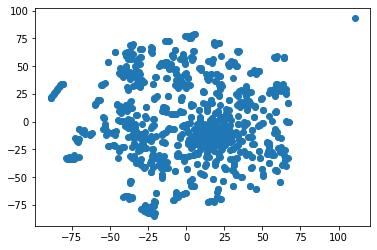

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'])